In [1]:
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y, x, id_ = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [34]:
x_train, y_train, x_test, y_test = split_data(x, y, ratio=0.9, seed = 42)
# Clean data
#y_train, tx_train = clean_data(y_train, tx_train)
#y_test, tx_test = clean_data(y_test, tx_test) #Test data should not be cleaned.
# Standardize data
#y_train_std = standardize(y_train)
x_train_std = standardize_features(x_train)
#y_test_std = standardize(y_test)
x_test_std = standardize_features(x_test)
#y_train = y_train_std[0]
x_train = x_train_std[0]
#y_test = y_test_std[0]
x_test = x_test_std[0]

tx_train = build_poly(x_train, 2)
tx_test = build_poly(x_test, 2)
print(tx_train)
tx_train.shape, tx_test.shape


[[ 1.          0.45598693 -0.4847834  ...  0.40851886  0.40851934
   0.55606086]
 [ 1.          0.42345116  0.69984786 ...  0.40851886  0.40851934
   0.55606086]
 [ 1.          0.40143016  0.79374034 ...  0.40851886  0.40851934
   0.55606086]
 ...
 [ 1.          0.26640857  0.0455462  ...  0.40851886  0.40851934
   0.1046841 ]
 [ 1.          0.39568812  0.44091423 ...  0.40851886  0.40851934
   0.02164346]
 [ 1.          0.62604629  1.17423852 ...  0.40851886  0.40851934
   0.55606086]]


((225000, 61), (25000, 61))

In [37]:
w_init = np.array([0]*tx_train.shape[1])
max_iter = 100000
gamma = 0.001
w_gd, loss_gd = least_squares_GD(y_train, tx_train, w_init, max_iter, gamma, pr=True, adapt_gamma = False, kind = 'mse')
gd_prediction = predict_labels(w_gd, tx_test)
acc_gd = accuracy_ratio(gd_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_gd)
print('Test loss = %.3f'%compute_loss(y_test, tx_test, w_gd))
print('Train loss = %.3f'%loss_gd)

GD (0/99999): loss=0.5
GD (100/99999): loss=0.3933244847297514
GD (200/99999): loss=0.3759187512683832
GD (300/99999): loss=0.36616162698599686
GD (400/99999): loss=0.3592903953500747
GD (500/99999): loss=0.35419231487256114
GD (600/99999): loss=0.35030381270122457
GD (700/99999): loss=0.3472769715098665
GD (800/99999): loss=0.34488191482576264
GD (900/99999): loss=0.3429601823185156
GD (1000/99999): loss=0.34139906425259764
GD (1100/99999): loss=0.3401164525642246
GD (1200/99999): loss=0.3390514089135657
GD (1300/99999): loss=0.33815802910278536
GD (1400/99999): loss=0.33740130805889773
GD (1500/99999): loss=0.33675427355084603
GD (1600/99999): loss=0.33619595439395655
GD (1700/99999): loss=0.33570991396363237
GD (1800/99999): loss=0.33528317587461803
GD (1900/99999): loss=0.334905427017017
GD (2000/99999): loss=0.3345684199165106
GD (2100/99999): loss=0.3342655202991315
GD (2200/99999): loss=0.3339913616883218
GD (2300/99999): loss=0.33374157972047713
GD (2400/99999): loss=0.33351260

GD (19700/99999): loss=0.3267454773145724
GD (19800/99999): loss=0.32673637727364446
GD (19900/99999): loss=0.3267273581152574
GD (20000/99999): loss=0.3267184187869964
GD (20100/99999): loss=0.32670955825362663
GD (20200/99999): loss=0.3267007754967499
GD (20300/99999): loss=0.32669206951446883
GD (20400/99999): loss=0.32668343932105826
GD (20500/99999): loss=0.3266748839466463
GD (20600/99999): loss=0.32666640243690137
GD (20700/99999): loss=0.32665799385272676
GD (20800/99999): loss=0.3266496572699633
GD (20900/99999): loss=0.3266413917790978
GD (21000/99999): loss=0.32663319648497907
GD (21100/99999): loss=0.32662507050653977
GD (21200/99999): loss=0.32661701297652673
GD (21300/99999): loss=0.32660902304123335
GD (21400/99999): loss=0.32660109986024294
GD (21500/99999): loss=0.32659324260617456
GD (21600/99999): loss=0.326585450464436
GD (21700/99999): loss=0.3265777226329823
GD (21800/99999): loss=0.3265700583220792
GD (21900/99999): loss=0.32656245675407275
GD (22000/99999): loss

GD (39100/99999): loss=0.3257906571840774
GD (39200/99999): loss=0.32578792514328697
GD (39300/99999): loss=0.3257852043023422
GD (39400/99999): loss=0.3257824945728551
GD (39500/99999): loss=0.32577979586736344
GD (39600/99999): loss=0.32577710809932076
GD (39700/99999): loss=0.32577443118308425
GD (39800/99999): loss=0.32577176503390515
GD (39900/99999): loss=0.32576910956791727
GD (40000/99999): loss=0.325766464702127
GD (40100/99999): loss=0.3257638303544033
GD (40200/99999): loss=0.3257612064434666
GD (40300/99999): loss=0.3257585928888796
GD (40400/99999): loss=0.32575598961103663
GD (40500/99999): loss=0.32575339653115465
GD (40600/99999): loss=0.3257508135712628
GD (40700/99999): loss=0.3257482406541934
GD (40800/99999): loss=0.32574567770357254
GD (40900/99999): loss=0.32574312464381006
GD (41000/99999): loss=0.3257405814000914
GD (41100/99999): loss=0.3257380478983677
GD (41200/99999): loss=0.3257355240653477
GD (41300/99999): loss=0.3257330098284879
GD (41400/99999): loss=0.

GD (58400/99999): loss=0.32540206509675473
GD (58500/99999): loss=0.32540054117519146
GD (58600/99999): loss=0.325399020722611
GD (58700/99999): loss=0.32539750372367104
GD (58800/99999): loss=0.32539599016314463
GD (58900/99999): loss=0.32539448002591886
GD (59000/99999): loss=0.32539297329699374
GD (59100/99999): loss=0.3253914699614815
GD (59200/99999): loss=0.32538997000460507
GD (59300/99999): loss=0.32538847341169713
GD (59400/99999): loss=0.3253869801681995
GD (59500/99999): loss=0.3253854902596611
GD (59600/99999): loss=0.3253840036717381
GD (59700/99999): loss=0.3253825203901919
GD (59800/99999): loss=0.32538104040088883
GD (59900/99999): loss=0.3253795636897988
GD (60000/99999): loss=0.3253780902429944
GD (60100/99999): loss=0.3253766200466502
GD (60200/99999): loss=0.32537515308704074
GD (60300/99999): loss=0.3253736893505412
GD (60400/99999): loss=0.3253722288236248
GD (60500/99999): loss=0.3253707714928635
GD (60600/99999): loss=0.3253693173449257
GD (60700/99999): loss=0.

GD (77800/99999): loss=0.32515778806139445
GD (77900/99999): loss=0.3251567434288312
GD (78000/99999): loss=0.32515570058674714
GD (78100/99999): loss=0.32515465953041045
GD (78200/99999): loss=0.32515362025511174
GD (78300/99999): loss=0.32515258275616427
GD (78400/99999): loss=0.32515154702890287
GD (78500/99999): loss=0.32515051306868437
GD (78600/99999): loss=0.3251494808708875
GD (78700/99999): loss=0.3251484504309123
GD (78800/99999): loss=0.32514742174418026
GD (78900/99999): loss=0.32514639480613455
GD (79000/99999): loss=0.32514536961223883
GD (79100/99999): loss=0.32514434615797805
GD (79200/99999): loss=0.3251433244388579
GD (79300/99999): loss=0.32514230445040476
GD (79400/99999): loss=0.32514128618816573
GD (79500/99999): loss=0.32514026964770804
GD (79600/99999): loss=0.32513925482461903
GD (79700/99999): loss=0.3251382417145066
GD (79800/99999): loss=0.32513723031299846
GD (79900/99999): loss=0.3251362206157418
GD (80000/99999): loss=0.3251352126184038
GD (80100/99999): 

GD (97200/99999): loss=0.32498398823912467
GD (97300/99999): loss=0.3249832223705609
GD (97400/99999): loss=0.32498245766020356
GD (97500/99999): loss=0.3249816941058015
GD (97600/99999): loss=0.32498093170511066
GD (97700/99999): loss=0.32498017045589345
GD (97800/99999): loss=0.32497941035591965
GD (97900/99999): loss=0.32497865140296567
GD (98000/99999): loss=0.3249778935948146
GD (98100/99999): loss=0.324977136929257
GD (98200/99999): loss=0.32497638140408897
GD (98300/99999): loss=0.32497562701711474
GD (98400/99999): loss=0.3249748737661442
GD (98500/99999): loss=0.3249741216489942
GD (98600/99999): loss=0.3249733706634886
GD (98700/99999): loss=0.32497262080745715
GD (98800/99999): loss=0.3249718720787368
GD (98900/99999): loss=0.32497112447517046
GD (99000/99999): loss=0.32497037799460826
GD (99100/99999): loss=0.32496963263490614
GD (99200/99999): loss=0.3249688883939266
GD (99300/99999): loss=0.32496814526953915
GD (99400/99999): loss=0.3249674032596187
GD (99500/99999): loss

In [11]:
w_init = np.array([0]*tx_train.shape[1])
max_iter = 10000
gamma = 1e-6
batch_size = 1

w_sgd, loss_sgd = least_squares_SGD(y_train, tx_train, w_init, batch_size, max_iter, gamma, pr = True, adapt_gamma=False, choose_best=True)
sgd_prediction = predict_labels(w_sgd, tx_test)
acc_sgd = accuracy_ratio(sgd_prediction, y_test)
print('Accuracy ratio = %.2f'%acc_sgd)
print('Test loss = %.2e'%compute_loss(y_test, tx_test, w_sgd))
print('Train loss = %.2e'%loss_sgd)

SGD (0/9999): loss=0.5
SGD (100/9999): loss=0.49632190110009655
SGD (200/9999): loss=0.5007559172544005
SGD (300/9999): loss=0.49452567187431024
SGD (400/9999): loss=0.5010617689449421
SGD (500/9999): loss=0.48218886339651934
SGD (600/9999): loss=0.4903904835994901
SGD (700/9999): loss=0.4781623675685008
SGD (800/9999): loss=0.4973767049384825
SGD (900/9999): loss=0.33693654336154566
SGD (1000/9999): loss=0.5086762191190576
SGD (1100/9999): loss=0.5435669333755644
SGD (1200/9999): loss=0.48507904695984394
SGD (1300/9999): loss=0.5182184600315236
SGD (1400/9999): loss=0.47802151893619993
SGD (1500/9999): loss=0.3744420053299664
SGD (1600/9999): loss=0.4475136359907532
SGD (1700/9999): loss=0.4789743036525788
SGD (1800/9999): loss=0.5635950412197825
SGD (1900/9999): loss=0.4812303523674276
SGD (2000/9999): loss=0.4647460214384664
SGD (2100/9999): loss=0.4731453047915628
SGD (2200/9999): loss=0.22866954826462624
SGD (2300/9999): loss=0.5188842895311421
SGD (2400/9999): loss=0.471617090689

In [12]:
w_lsq, loss_lsq = least_squares(y_train, tx_train)
lsq_prediction = predict_labels(w_lsq, tx_test)
acc_lsq = accuracy_ratio(lsq_prediction, y_test)
print('Accuracy ratio = %.2f'%acc_lsq)
print('Train loss = %.2f'%loss_lsq)
print('Test loss = %.2e'%compute_loss(y_test, tx_test, w_lsq))

Accuracy ratio = 0.61
Train loss = 0.29
Test loss = 5.63e+07


In [13]:
lambda_ = 2.6e-4
w_rr, loss_rr = ridge_regression(y_train, tx_train, lambda_)
rr_prediction = predict_labels(w_rr, tx_test)
acc_rr = accuracy_ratio(rr_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_rr)
print('Test loss = %.3f'%compute_loss(y_test, tx_test, w_rr))
print('Train loss = %.3f'%loss_rr)

Accuracy ratio = 0.752
Test loss = 0.367
Train loss = 0.296


In [14]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 3, 50)
    # split the data, and return train and test data
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # form train and test data with offset column
    x_train_std = standardize_features(x_train)[0]
    x_test_std = standardize_features(x_test)[0]
    tx_train=build_poly(x_train_std, degree)
    tx_test=build_poly(x_test_std, degree)
    rmse_tr = []
    rmse_te = []
    accuracies = []
    for ind, lambda_ in enumerate(lambdas):
        # calcualte weight through least square.
        w_train, loss_train = ridge_regression(y_train, tx_train, lambda_)
        rmse_tr.append(np.sqrt(2*loss_train))
        rmse_te.append(np.sqrt(2*compute_loss(y_test, tx_test, w_train, kind = 'mse')))
        accuracies.append(accuracy_ratio(predict_labels(w_train, tx_test), y_test))
        print("proportion={p}, degree={d}, lambda={l:.3e}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}, Accuracy={ac:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind], ac=accuracies[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    plt.figure()
    plt.semilogx(lambdas,accuracies, marker='o')
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("../results/ridge_regression")

proportion=0.9, degree=5, lambda=1.000e-05, Training RMSE=0.749, Testing RMSE=3.918, Accuracy=0.612
proportion=0.9, degree=5, lambda=1.456e-05, Training RMSE=0.749, Testing RMSE=2.743, Accuracy=0.624
proportion=0.9, degree=5, lambda=2.121e-05, Training RMSE=0.750, Testing RMSE=1.817, Accuracy=0.630
proportion=0.9, degree=5, lambda=3.089e-05, Training RMSE=0.751, Testing RMSE=1.183, Accuracy=0.632
proportion=0.9, degree=5, lambda=4.498e-05, Training RMSE=0.752, Testing RMSE=0.874, Accuracy=0.758
proportion=0.9, degree=5, lambda=6.551e-05, Training RMSE=0.753, Testing RMSE=0.827, Accuracy=0.800
proportion=0.9, degree=5, lambda=9.541e-05, Training RMSE=0.753, Testing RMSE=0.874, Accuracy=0.808
proportion=0.9, degree=5, lambda=1.389e-04, Training RMSE=0.754, Testing RMSE=0.910, Accuracy=0.802
proportion=0.9, degree=5, lambda=2.024e-04, Training RMSE=0.755, Testing RMSE=0.911, Accuracy=0.796
proportion=0.9, degree=5, lambda=2.947e-04, Training RMSE=0.756, Testing RMSE=0.885, Accuracy=0.790


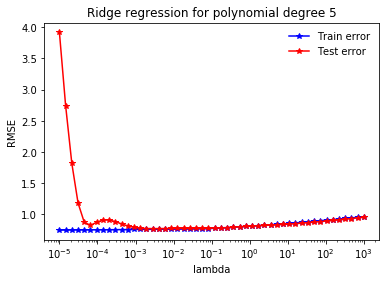

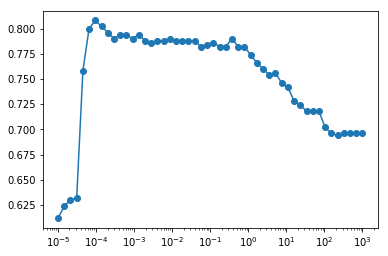

In [28]:
seed = 42
degree = 5
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [29]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    id_test = k_indices[k]
    id_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    x_test = x[id_test]
    x_train = x[id_train]
    y_test = y[id_test]
    y_train = y[id_train]
    x_train_std = standardize(x_train)[0]
    x_test_std = standardize(x_test)[0]
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
    # ridge regression
    weight, loss_tr = ridge_regression(y_train, tx_train, lambda_)
    # calculate the loss for train and test data
    loss_te = compute_loss(y_test, tx_test, weight)
    accuracy = accuracy_ratio(predict_labels(weight, tx_test), y_test)

    return loss_tr, loss_te, accuracy

Best lambda from accuracy: 6.21e-03
Best lambda from error: 1.08e-01


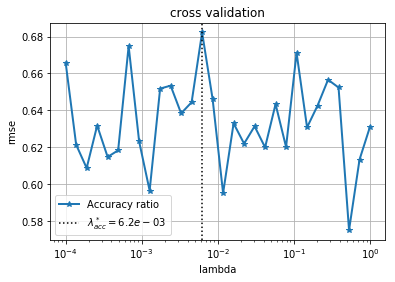

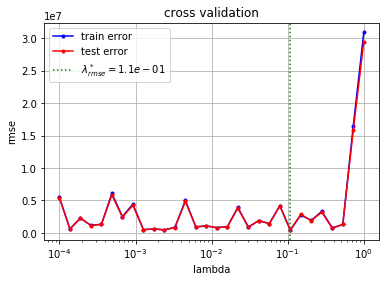

In [30]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    best_l_err = lambds[np.argmin(mse_te)]
    print('Best lambda from error: %.2e'%best_l_err)
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.axvline(best_l_err, c = 'g', label = '$\lambda^*_{rmse}=%.1e$'%best_l_err, ls = ':')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation")
def cross_validation_visualization_accuracy(lambdas, accuracies):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambdas, accuracies, lw =2, marker = '*', label = 'Accuracy ratio')
    best_l_acc = lambdas[np.argmax(accuracies)]
    plt.axvline(best_l_acc, c= 'k', label = '$\lambda^*_{acc}=%.1e$'%best_l_acc, ls = ':')
    print('Best lambda from accuracy: %.2e'%best_l_acc)
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation_accuracies")
def cross_validation_demo():
    seed = 42
    degree = 7
    k_fold = 10
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    std_tr = []
    std_te = []
    accuracies = []
    # cross validation
    for ind, lambda_ in enumerate(lambdas):
        x_validation = np.array([cross_validation(y, x, k_indices, k, lambda_, degree) for k in range(k_fold)])
        rmse_tr.append(np.mean(np.sqrt(2 * x_validation[:, 0])))
        rmse_te.append(np.mean(np.sqrt(2 * x_validation[:, 1])))
        std_tr.append(np.std(np.sqrt(2 * x_validation[:, 0])))
        std_te.append(np.std(np.sqrt(2 * x_validation[:, 1])))
        accuracies.append(np.mean(x_validation[:,2]))
    cross_validation_visualization_accuracy(lambdas, accuracies)
    plt.figure()
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()


In [35]:
print(id_out_test.shape)
x_out_test_std = standardize_features(x_out_test)
x_out = x_out_test_std[0]
tx_out = add_offset_column(x_out)

create_csv_submission(id_out_test, predict_labels(w_rr, tx_out) , '../results/rr_pred.csv')
create_csv_submission(id_out_test, predict_labels(w_gd, tx_out) , '../results/gd_pred_noadapt.csv')
create_csv_submission(id_out_test, predict_labels(w_lsq, tx_out) , '../results/lsq_pred.csv')
create_csv_submission(id_out_test, predict_labels(w_sgd, tx_out) , '../results/sgd_pred_noadapt.csv')

(568238,)


# Logistic Regression

In [77]:
w_init = np.array([0]*tx_train.shape[1])
max_iter = 4000
gamma = 1e-7
w_lrgd, loss_lrgd = logistic_regression(y_train, tx_train, w_init, max_iter, gamma, pr=True, adapt_gamma = False)
lrgd_prediction = predict_labels(w_lrgd, tx_test)
acc_lrgd = accuracy_ratio(lrgd_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_lrgd)
print('Test loss = %.3f'%compute_loss_logistic(y_test, tx_test, w_lrgd))
print('Train loss = %.3f'%loss_lrgd)

Logistic Regression GD (0/3999): loss=3119.1623125199
Logistic Regression GD (100/3999): loss=-5052.666973716754
Logistic Regression GD (200/3999): loss=-11433.464618887743
Logistic Regression GD (300/3999): loss=-17413.60415105426
Logistic Regression GD (400/3999): loss=-23223.98806948015
Logistic Regression GD (500/3999): loss=-28945.610910390023
Logistic Regression GD (600/3999): loss=-34614.76643112936
Logistic Regression GD (700/3999): loss=-40250.402858839385
Logistic Regression GD (800/3999): loss=-45863.44758469955
Logistic Regression GD (900/3999): loss=-51460.63998304881
Logistic Regression GD (1000/3999): loss=-57046.342020135344
Logistic Regression GD (1100/3999): loss=-62623.481785886215
Logistic Regression GD (1200/3999): loss=-68194.07948376483
Logistic Regression GD (1300/3999): loss=-73759.56306488346
Logistic Regression GD (1400/3999): loss=-79320.97905633446
Logistic Regression GD (1500/3999): loss=-84879.11791756989
Logistic Regression GD (1600/3999): loss=-90434.58

In [32]:
lambda_ = 10000
gamma = 1e-8
w_rlrgd, loss_rlrgd = reg_logistic_regression(y_train, tx_train, lambda_, w_init, max_iter, gamma, pr=True, adapt_gamma = False)
rlrgd_prediction = predict_labels(w_rlrgd, tx_test)
acc_rlrgd = accuracy_ratio(rlrgd_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_rlrgd)
print('Test loss = %.3f'%compute_loss_logistic(y_test, tx_test, w_rlrgd))
print('Train loss = %.3f'%loss_rlrgd)

 Regularized Logistic Regression GD (0/99999): loss=3119.1623125199
 Regularized Logistic Regression GD (100/99999): loss=2688.691845895465
 Regularized Logistic Regression GD (200/99999): loss=2304.1297938103958
 Regularized Logistic Regression GD (300/99999): loss=1956.6286948875052
 Regularized Logistic Regression GD (400/99999): loss=1639.7748428355728
 Regularized Logistic Regression GD (500/99999): loss=1348.914140418746
 Regularized Logistic Regression GD (600/99999): loss=1080.5033867836107
 Regularized Logistic Regression GD (700/99999): loss=831.7359821070947
 Regularized Logistic Regression GD (800/99999): loss=600.3250439258538
 Regularized Logistic Regression GD (900/99999): loss=384.36877008910847
 Regularized Logistic Regression GD (1000/99999): loss=182.26125630421242
 Regularized Logistic Regression GD (1100/99999): loss=-7.369722867539792
 Regularized Logistic Regression GD (1200/99999): loss=-185.70792245373315
 Regularized Logistic Regression GD (1300/99999): loss=-

 Regularized Logistic Regression GD (11100/99999): loss=-4452.0831827090915
 Regularized Logistic Regression GD (11200/99999): loss=-4460.098721637905
 Regularized Logistic Regression GD (11300/99999): loss=-4467.930977109281
 Regularized Logistic Regression GD (11400/99999): loss=-4475.584434416149
 Regularized Logistic Regression GD (11500/99999): loss=-4483.06345635949
 Regularized Logistic Regression GD (11600/99999): loss=-4490.372287174869
 Regularized Logistic Regression GD (11700/99999): loss=-4497.515056305698
 Regularized Logistic Regression GD (11800/99999): loss=-4504.495782030524
 Regularized Logistic Regression GD (11900/99999): loss=-4511.318374951188
 Regularized Logistic Regression GD (12000/99999): loss=-4517.986641348391
 Regularized Logistic Regression GD (12100/99999): loss=-4524.504286410783
 Regularized Logistic Regression GD (12200/99999): loss=-4530.87491734338
 Regularized Logistic Regression GD (12300/99999): loss=-4537.1020463608065
 Regularized Logistic Reg

 Regularized Logistic Regression GD (22200/99999): loss=-4783.685681024971
 Regularized Logistic Regression GD (22300/99999): loss=-4784.385164656912
 Regularized Logistic Regression GD (22400/99999): loss=-4785.069888984767
 Regularized Logistic Regression GD (22500/99999): loss=-4785.7401696599845
 Regularized Logistic Regression GD (22600/99999): loss=-4786.396315447468
 Regularized Logistic Regression GD (22700/99999): loss=-4787.038628380373
 Regularized Logistic Regression GD (22800/99999): loss=-4787.667403911321
 Regularized Logistic Regression GD (22900/99999): loss=-4788.282931060018
 Regularized Logistic Regression GD (23000/99999): loss=-4788.885492557426
 Regularized Logistic Regression GD (23100/99999): loss=-4789.475364986581
 Regularized Logistic Regression GD (23200/99999): loss=-4790.05281892007
 Regularized Logistic Regression GD (23300/99999): loss=-4790.61811905435
 Regularized Logistic Regression GD (23400/99999): loss=-4791.171524340907
 Regularized Logistic Regr

 Regularized Logistic Regression GD (33200/99999): loss=-4813.809512281921
 Regularized Logistic Regression GD (33300/99999): loss=-4813.878320711301
 Regularized Logistic Regression GD (33400/99999): loss=-4813.94570566586
 Regularized Logistic Regression GD (33500/99999): loss=-4814.011696745802
 Regularized Logistic Regression GD (33600/99999): loss=-4814.076322931651
 Regularized Logistic Regression GD (33700/99999): loss=-4814.139612597307
 Regularized Logistic Regression GD (33800/99999): loss=-4814.201593522888
 Regularized Logistic Regression GD (33900/99999): loss=-4814.262292907268
 Regularized Logistic Regression GD (34000/99999): loss=-4814.321737380318
 Regularized Logistic Regression GD (34100/99999): loss=-4814.379953014953
 Regularized Logistic Regression GD (34200/99999): loss=-4814.436965338865
 Regularized Logistic Regression GD (34300/99999): loss=-4814.492799346009
 Regularized Logistic Regression GD (34400/99999): loss=-4814.547479507894
 Regularized Logistic Regr

 Regularized Logistic Regression GD (44300/99999): loss=-4816.814876021127
 Regularized Logistic Regression GD (44400/99999): loss=-4816.821712180339
 Regularized Logistic Regression GD (44500/99999): loss=-4816.828408159519
 Regularized Logistic Regression GD (44600/99999): loss=-4816.834966841185
 Regularized Logistic Regression GD (44700/99999): loss=-4816.841391048381
 Regularized Logistic Regression GD (44800/99999): loss=-4816.847683545903
 Regularized Logistic Regression GD (44900/99999): loss=-4816.853847041524
 Regularized Logistic Regression GD (45000/99999): loss=-4816.85988418716
 Regularized Logistic Regression GD (45100/99999): loss=-4816.8657975800215
 Regularized Logistic Regression GD (45200/99999): loss=-4816.871589763774
 Regularized Logistic Regression GD (45300/99999): loss=-4816.877263229618
 Regularized Logistic Regression GD (45400/99999): loss=-4816.882820417382
 Regularized Logistic Regression GD (45500/99999): loss=-4816.888263716602
 Regularized Logistic Reg

 Regularized Logistic Regression GD (55300/99999): loss=-4817.114457316294
 Regularized Logistic Regression GD (55400/99999): loss=-4817.115161664837
 Regularized Logistic Regression GD (55500/99999): loss=-4817.115851645603
 Regularized Logistic Regression GD (55600/99999): loss=-4817.116527552217
 Regularized Logistic Regression GD (55700/99999): loss=-4817.117189672299
 Regularized Logistic Regression GD (55800/99999): loss=-4817.117838287572
 Regularized Logistic Regression GD (55900/99999): loss=-4817.118473674004
 Regularized Logistic Regression GD (56000/99999): loss=-4817.119096101899
 Regularized Logistic Regression GD (56100/99999): loss=-4817.1197058360385
 Regularized Logistic Regression GD (56200/99999): loss=-4817.120303135764
 Regularized Logistic Regression GD (56300/99999): loss=-4817.120888255119
 Regularized Logistic Regression GD (56400/99999): loss=-4817.121461442951
 Regularized Logistic Regression GD (56500/99999): loss=-4817.1220229430055
 Regularized Logistic R

 Regularized Logistic Regression GD (66400/99999): loss=-4817.145505562739
 Regularized Logistic Regression GD (66500/99999): loss=-4817.145577377308
 Regularized Logistic Regression GD (66600/99999): loss=-4817.145647732413
 Regularized Logistic Regression GD (66700/99999): loss=-4817.1457166577575
 Regularized Logistic Regression GD (66800/99999): loss=-4817.145784182436
 Regularized Logistic Regression GD (66900/99999): loss=-4817.145850334957
 Regularized Logistic Regression GD (67000/99999): loss=-4817.145915143238
 Regularized Logistic Regression GD (67100/99999): loss=-4817.145978634638
 Regularized Logistic Regression GD (67200/99999): loss=-4817.146040835946
 Regularized Logistic Regression GD (67300/99999): loss=-4817.146101773415
 Regularized Logistic Regression GD (67400/99999): loss=-4817.146161472758
 Regularized Logistic Regression GD (67500/99999): loss=-4817.14621995917
 Regularized Logistic Regression GD (67600/99999): loss=-4817.14627725732
 Regularized Logistic Regr

 Regularized Logistic Regression GD (77400/99999): loss=-4817.148671820955
 Regularized Logistic Regression GD (77500/99999): loss=-4817.148679351146
 Regularized Logistic Regression GD (77600/99999): loss=-4817.148686728736
 Regularized Logistic Regression GD (77700/99999): loss=-4817.148693956828
 Regularized Logistic Regression GD (77800/99999): loss=-4817.148701038446
 Regularized Logistic Regression GD (77900/99999): loss=-4817.148707976573
 Regularized Logistic Regression GD (78000/99999): loss=-4817.148714774111
 Regularized Logistic Regression GD (78100/99999): loss=-4817.148721433914
 Regularized Logistic Regression GD (78200/99999): loss=-4817.148727958781
 Regularized Logistic Regression GD (78300/99999): loss=-4817.148734351444
 Regularized Logistic Regression GD (78400/99999): loss=-4817.148740614584
 Regularized Logistic Regression GD (78500/99999): loss=-4817.148746750831
 Regularized Logistic Regression GD (78600/99999): loss=-4817.148752762758
 Regularized Logistic Reg